In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [2]:
X_train=np.loadtxt('train_X.csv',delimiter=',').T
Y_train=np.loadtxt('train_label.csv',delimiter=',').T

X_test=np.loadtxt('test_X.csv',delimiter=',').T
Y_test=np.loadtxt('test_label.csv',delimiter=',').T

In [3]:
print("shape of X_train : " , X_train.shape)
print("shape of Y_train : " , Y_train.shape)
print("shape of X_test : " , X_test.shape)
print("shape of  Y_test: " , Y_test.shape)
      

shape of X_train :  (784, 1000)
shape of Y_train :  (10, 1000)
shape of X_test :  (784, 350)
shape of  Y_test:  (10, 350)


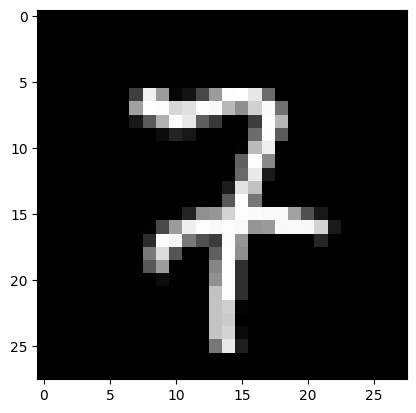

In [4]:
index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap='gray')
plt.show()

In [5]:
def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x,0)
def softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX,axis=0)

In [6]:
def derivative_tanh(x):
    return (1-np.power(np.tanh(x),2))
def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)
    

In [7]:
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))

    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))

    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters

In [8]:
def forward_propagation(x,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']

    z1=np.dot(w1,x)+b1
    a1=relu(z1)

    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)

    forward_cache={
        "z1":z1,
        "a1":a1,
        "z2":z2,
        "a2":a2
    }
    return forward_cache

    
    

In [9]:
def cost_function(a2,y):
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(a2))
    return cost
    

In [10]:
def backward_prop(x,y,parameters,forward_cache):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']

    a1=forward_cache['a1']
    a2=forward_cache['a2']

    m=x.shape[1]

    dz2=(a2-y)
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)

    dz1=(1/m)*np.dot(w2.T,dz2)*derivative_relu(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)

    gradients={
        "dw1":dw1,
        "db1":db1,
        "dw2":dw2,
        "db2":db2
    }
    return gradients

    

In [11]:
def update_parameters(parameters,gradients,learning_rate):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]

    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']

    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2

    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters

In [12]:
def model(x,y,n_h,learning_rate,iterations):
    n_x=x.shape[0]
    n_y=y.shape[0]
    cost_list=[]
    parameters=initialize_parameters(n_x,n_h,n_y)
    for i in range(iterations):
        forward_cache=forward_propagation(x,parameters)
        cost=cost_function(forward_cache['a2'],y)
        gradients=backward_prop(x,y,parameters,forward_cache)
        parameters=update_parameters(parameters,gradients,learning_rate)
        cost_list.append(cost)
        if i%100==0:
            print(f"Iterations{i},Cost={cost}")
        
    return parameters,cost_list
    

In [13]:
iterations=1000
n_h=1000
learning_rate=0.001
parameters,cost_list=model(X_train,Y_train,n_h=n_h,learning_rate=learning_rate,iterations=iterations)

Iterations0,Cost=12.273754274673149
Iterations100,Cost=0.05953373203835684
Iterations200,Cost=0.01804204262296388
Iterations300,Cost=0.011833158519153881
Iterations400,Cost=0.009030566863441966
Iterations500,Cost=0.007381604600535788
Iterations600,Cost=0.006278684188994194
Iterations700,Cost=0.005482274492392321
Iterations800,Cost=0.004876942492901164
Iterations900,Cost=0.0043995541247288565


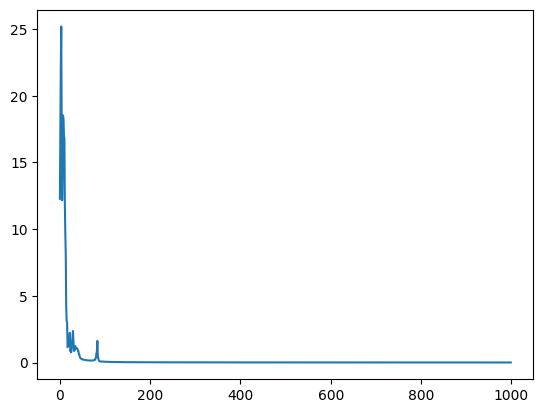

In [14]:
t=np.arange(0,iterations)
plt.plot(t,cost_list)
plt.show()

In [16]:
def accuracy(inp,labels,parameters):
    forward_cache=forward_propagation(X_train,parameters)
    a_out=forward_cache['a2']
    a_out=np.argmax(a_out,0)
    y_out=np.argmax(Y_train,0)
    a_out=y_out
    acc=np.mean(a_out==y_out)*100

    return acc
   


In [17]:
print("Accuracy of Train Dataset is :",accuracy(X_train,Y_train,parameters),"%")
print("Accuracy of Test Dataset is :",round(accuracy(X_test,Y_test,parameters),2),"%")

Accuracy of Train Dataset is : 100.0 %
Accuracy of Test Dataset is : 100.0 %


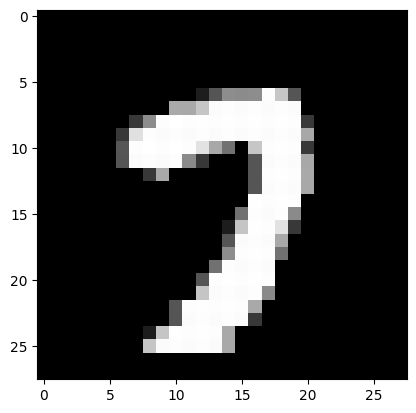

Our model says,it is : 7


In [40]:
idx=random.randrange(0,X_test.shape[1])
plt.imshow(X_test[:,idx].reshape(28,28),cmap='gray')
plt.show()

forward_cache=forward_propagation(X_test[:,idx].reshape(X_test.shape[0],1),parameters)
a_out=forward_cache['a2']
a_out=np.argmax(a_out,0)

print("Our model says,it is :",a_out[0])